**Lab Assignment 4: Neural Networks**

This assignment is about building neural networks in Python. You will be introduced to the PyTorch library which is commonly used in Python coding for machine learning.

**Remember to follow the principles of the rubric we developed:**

1. Clarity/Comments
2. Accuracy
3. Typos
4. Grammar/Syntax

**Possible Resources:**

https://www.tensorflow.org/guide/tensor

https://towardsdatascience.com/complete-guide-to-adam-optimization-1e5f29532c3d
https://machinelearningmastery.com/

adam-optimization-algorithm-for-deep-learning/

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6




In [1]:
# Import the following packages:
import numpy as np
import matplotlib.pyplot as plt
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

1.) Our goal is to build a neural network which, when trained, will represent an approximation of sin(x) from a sample of N equidistant points between x=0 and x=pi/2, and examine how various changes will affect the accuracy of the network.

a). Generate the N equidistant points in the sin function between 0 and pi/2.


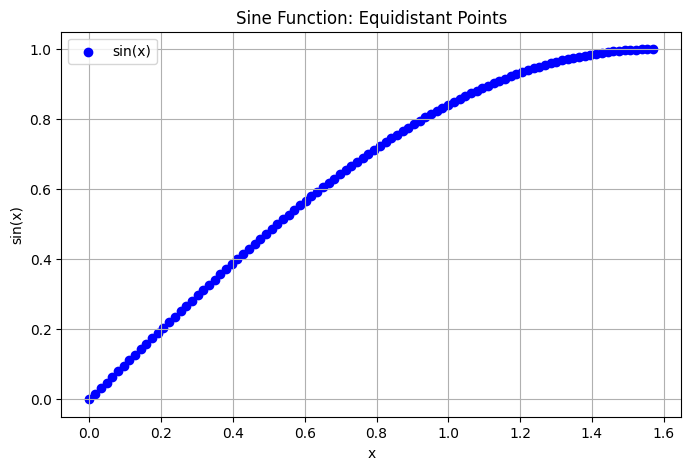

In [2]:
# Define N =
# Generate the points using x = np.linspace()
# Map the sine function from the generated x points using y = np.sin(x)

# Graph the points using:
# plt.figure()
# plt.scatter(x,y)

# Define N (number of points)
N = 100

# Generate the points using x = np.linspace()
x = np.linspace(0, np.pi/2, N)

# Map the sine function from the generated x points using y = np.sin(x)
y = np.sin(x)

# Graph the points
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='sin(x)')
plt.title('Sine Function: Equidistant Points')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid()
plt.show()


b). Reshape the data from a NumPy array into a PyTorch Tensor to prep it for the network.


In [3]:
# Eg: x = torch.from_numpy(x.reshape(-1, 1)).float()

# torch.from_numpy() converts the reshaped NumPy array x into a PyTorch tensor.
# This is useful for working with neural networks because PyTorch tensors are used as the primary data structure for computations in PyTorch.

#the reshape.(-1, 1) reshapes the x np array into a 2D array where there is only one column
# -1 signals that the shape is computed based on the number of rows

#.float() converts the PyTorch tensor into a float datatype, the most common for network calculations

# Convert the numpy arrays x and y into PyTorch tensors
x_tensor = torch.from_numpy(x.reshape(-1, 1)).float()
y_tensor = torch.from_numpy(y.reshape(-1, 1)).float()

# Print tensor shapes to confirm
print(f"x_tensor shape: {x_tensor.shape}")
print(f"y_tensor shape: {y_tensor.shape}")


x_tensor shape: torch.Size([100, 1])
y_tensor shape: torch.Size([100, 1])


c). Define the network architecture, starting with two layers and width 10.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the first layer: input to hidden layer (width = 10)
        self.layer1 = torch.nn.Linear(1, 10)
        # Define the second layer: hidden layer to output
        self.layer2 = torch.nn.Linear(10, 1)
        # Activation function (Tanh)
        self.activation = torch.nn.Tanh()

    def forward(self, x):
        # Pass through layer1 and apply activation
        x = self.layer1(x)
        x = self.activation(x)
        # Pass through layer2
        x = self.layer2(x)
        return x

# Instantiate the network
net = Net()
print(net)


Net(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
  (activation): Tanh()
)


d). Define the optimizer and loss function. Start with 1000 epochs

In [5]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

# Training data (already converted to tensors)
inputs = x_tensor
outputs = y_tensor

# Number of epochs
num_epochs = 1000

# Training loop
for i in range(num_epochs):
    # Forward pass: compute predictions
    prediction = net(inputs)
    # Compute loss
    loss = loss_func(prediction, outputs)
    # Zero gradients
    optimizer.zero_grad()
    # Backward pass: compute gradients
    loss.backward()
    # Update weights
    optimizer.step()
    
    # Print progress every 100 epochs
    if i % 100 == 0:
        print(f'Epoch {i}, Loss: {loss.item()}')


Epoch 0, Loss: 0.23826603591442108
Epoch 100, Loss: 0.0017265989445149899
Epoch 200, Loss: 0.0007272380753420293
Epoch 300, Loss: 0.0003870691289193928
Epoch 400, Loss: 0.0002884957066271454
Epoch 500, Loss: 0.0002242144983028993
Epoch 600, Loss: 0.0001778954319888726
Epoch 700, Loss: 0.0001419150794390589
Epoch 800, Loss: 0.00011207321949768811
Epoch 900, Loss: 8.661505853524432e-05


e). Plot predicted and true functions


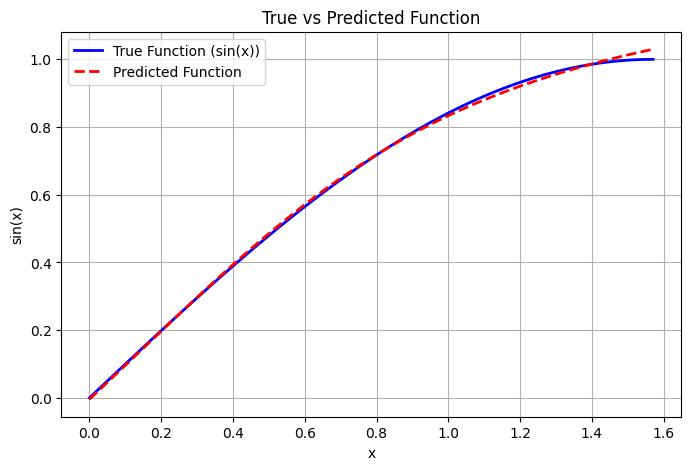

In [6]:
# Plot predicted and true functions
plt.figure(figsize=(8, 5))

# True function (sin(x))
plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), label='True Function (sin(x))', color='blue', linewidth=2)

# Predicted function (output of the trained network)
plt.plot(x_tensor.detach().numpy(), net(x_tensor).detach().numpy(), label='Predicted Function', color='red', linestyle='--', linewidth=2)

# Add labels, legend, and grid for clarity
plt.title('True vs Predicted Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid()

# Show the plot
plt.show()


Repeat steps a). through e)., but change N so that N=4, 8, 16, 32, 100.




Training with N = 4
Epoch 0, Loss: 0.20474830269813538
Epoch 100, Loss: 0.0006197718321345747
Epoch 200, Loss: 0.00035190547350794077
Epoch 300, Loss: 0.00031183837563730776
Epoch 400, Loss: 0.00027316558407619596
Epoch 500, Loss: 0.00023542469716630876
Epoch 600, Loss: 0.00019934085139539093
Epoch 700, Loss: 0.00016513395530637354
Epoch 800, Loss: 0.00013303285231813788
Epoch 900, Loss: 0.00010350235970690846


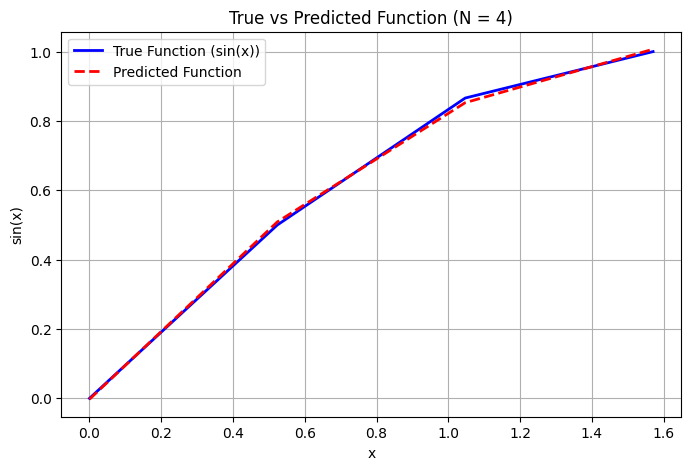


Training with N = 8
Epoch 0, Loss: 1.2949957847595215
Epoch 100, Loss: 0.004907272290438414
Epoch 200, Loss: 0.0013757122214883566
Epoch 300, Loss: 0.0002972120128106326
Epoch 400, Loss: 0.00019129639258608222
Epoch 500, Loss: 0.000164630328072235
Epoch 600, Loss: 0.00014314627333078533
Epoch 700, Loss: 0.00012498095748014748
Epoch 800, Loss: 0.00011025709682144225
Epoch 900, Loss: 9.872933878796175e-05


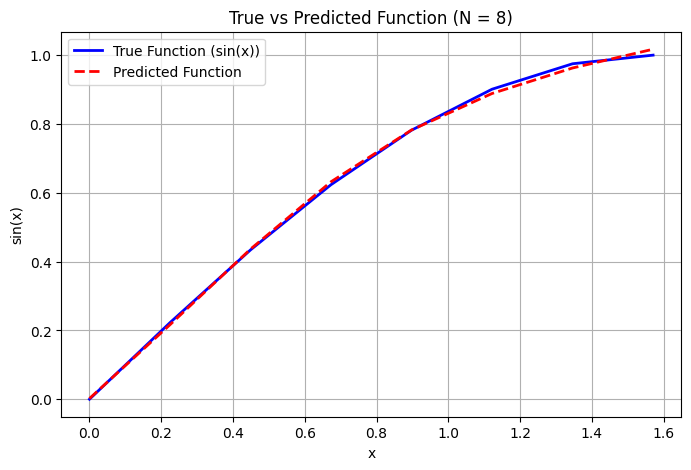


Training with N = 16
Epoch 0, Loss: 0.45536577701568604
Epoch 100, Loss: 0.002054643351584673
Epoch 200, Loss: 0.0010734244715422392
Epoch 300, Loss: 0.00048419320955872536
Epoch 400, Loss: 0.00029277533758431673
Epoch 500, Loss: 0.0002453571942169219
Epoch 600, Loss: 0.00022253749193623662
Epoch 700, Loss: 0.00020312602282501757
Epoch 800, Loss: 0.0001854613801697269
Epoch 900, Loss: 0.00016946137475315481


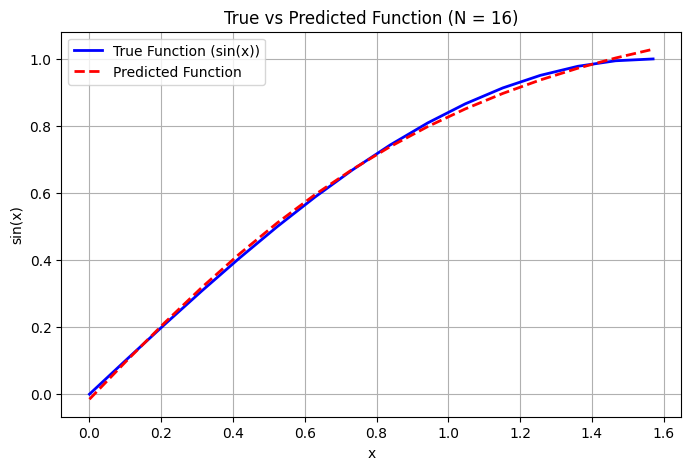


Training with N = 32
Epoch 0, Loss: 0.43312880396842957
Epoch 100, Loss: 0.002187261590734124
Epoch 200, Loss: 0.0015290521550923586
Epoch 300, Loss: 0.0009061895543709397
Epoch 400, Loss: 0.00048372586024925113
Epoch 500, Loss: 0.0002817253116518259
Epoch 600, Loss: 0.00020627079356927425
Epoch 700, Loss: 0.00017367189866490662
Epoch 800, Loss: 0.00015100327436812222
Epoch 900, Loss: 0.00013125753321219236


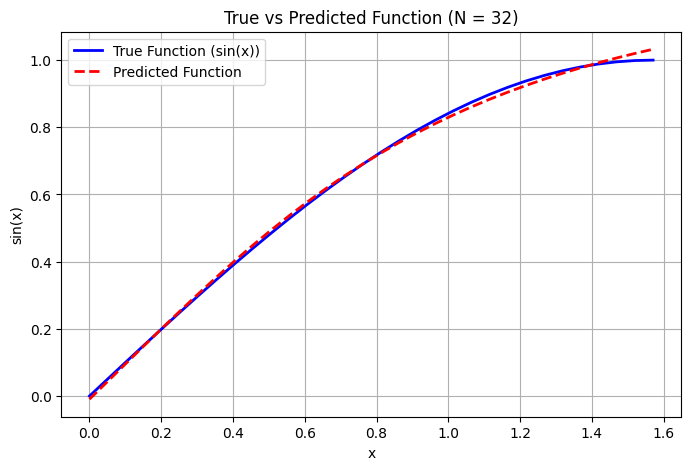


Training with N = 100
Epoch 0, Loss: 0.13629050552845
Epoch 100, Loss: 0.0006507809739559889
Epoch 200, Loss: 5.093451909488067e-05
Epoch 300, Loss: 2.8426682547433302e-05
Epoch 400, Loss: 2.638061050674878e-05
Epoch 500, Loss: 2.462062366248574e-05
Epoch 600, Loss: 2.3101196347852238e-05
Epoch 700, Loss: 2.1836058294866234e-05
Epoch 800, Loss: 2.080542799376417e-05
Epoch 900, Loss: 1.9970733774243854e-05


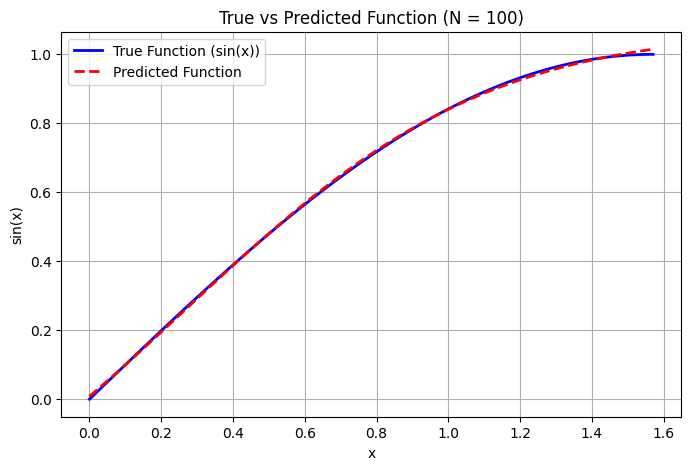

In [7]:
# Define a function to perform the entire training process for different values of N
def train_and_plot_for_different_N(N_values):
    for N in N_values:
        print(f"\nTraining with N = {N}")
        
        # Generate data
        x = np.linspace(0, np.pi/2, N)
        y = np.sin(x)
        
        # Convert to PyTorch tensors
        x_tensor = torch.from_numpy(x.reshape(-1, 1)).float()
        y_tensor = torch.from_numpy(y.reshape(-1, 1)).float()
        
        # Define the network
        net = Net()
        
        # Define optimizer and loss function
        optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
        loss_func = torch.nn.MSELoss()
        
        # Training loop
        num_epochs = 1000
        for i in range(num_epochs):
            prediction = net(x_tensor)
            loss = loss_func(prediction, y_tensor)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss.item()}")
        
        # Plot true vs predicted functions
        plt.figure(figsize=(8, 5))
        plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), label='True Function (sin(x))', color='blue', linewidth=2)
        plt.plot(x_tensor.detach().numpy(), net(x_tensor).detach().numpy(), label='Predicted Function', color='red', linestyle='--', linewidth=2)
        plt.title(f'True vs Predicted Function (N = {N})')
        plt.xlabel('x')
        plt.ylabel('sin(x)')
        plt.legend()
        plt.grid()
        plt.show()

# Test with different values of N
train_and_plot_for_different_N([4, 8, 16, 32, 100])


Keeping N= 100, change the network to have 10, and then 20 layers. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.

In [8]:
# Redefine the network with 10 layers
class DeepNet10(nn.Module):
    def __init__(self):
        super(DeepNet10, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            *[nn.Sequential(nn.Linear(10, 10), nn.Tanh()) for _ in range(8)],  # 8 hidden layers
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Instantiate the network
net = DeepNet10()

# Train with 10 layers
print("\nTraining with 10 layers...")
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()
for i in range(1000):
    prediction = net(x_tensor)
    loss = loss_func(prediction, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")



Training with 10 layers...
Epoch 0, Loss: 0.8678084015846252
Epoch 100, Loss: 0.0002020054089371115
Epoch 200, Loss: 7.603404355904786e-06
Epoch 300, Loss: 1.1065288163081277e-05
Epoch 400, Loss: 4.377784080134006e-06
Epoch 500, Loss: 0.0001883969089249149
Epoch 600, Loss: 6.049689091014443e-06
Epoch 700, Loss: 4.285996055841679e-06
Epoch 800, Loss: 4.311789325583959e-06
Epoch 900, Loss: 7.410992566292407e-06


In [9]:
# Redefine the network with 20 layers
class DeepNet20(nn.Module):
    def __init__(self):
        super(DeepNet20, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            nn.Tanh(),
            *[nn.Sequential(nn.Linear(10, 10), nn.Tanh()) for _ in range(18)],  # 18 hidden layers
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Instantiate the network
net = DeepNet20()

# Train with 20 layers
print("\nTraining with 20 layers...")
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()
for i in range(1000):
    prediction = net(x_tensor)
    loss = loss_func(prediction, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")



Training with 20 layers...
Epoch 0, Loss: 0.25266969203948975
Epoch 100, Loss: 0.09647058695554733
Epoch 200, Loss: 0.0964696854352951
Epoch 300, Loss: 0.0964696854352951
Epoch 400, Loss: 0.09646967798471451
Epoch 500, Loss: 0.04413136839866638
Epoch 600, Loss: 0.06271824240684509
Epoch 700, Loss: 0.0627182275056839
Epoch 800, Loss: 0.0627182275056839
Epoch 900, Loss: 0.0627182275056839


Keeping N=100 and using 10 layers, alter the activation function of the network. Try instead of Tanh, the Sigmoid, ReLu, and Leaky ReLu activation functions. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.




Training with Tanh activation function...
Epoch 0, Loss: 0.23566609621047974
Epoch 100, Loss: 0.0004520027432590723
Epoch 200, Loss: 2.0829669665545225e-05
Epoch 300, Loss: 1.0388725058874115e-05
Epoch 400, Loss: 6.578584816452349e-06
Epoch 500, Loss: 9.631494322093204e-06
Epoch 600, Loss: 5.746545411966508e-06
Epoch 700, Loss: 5.497293841472128e-06
Epoch 800, Loss: 8.677673577039968e-06
Epoch 900, Loss: 9.316489013144746e-06


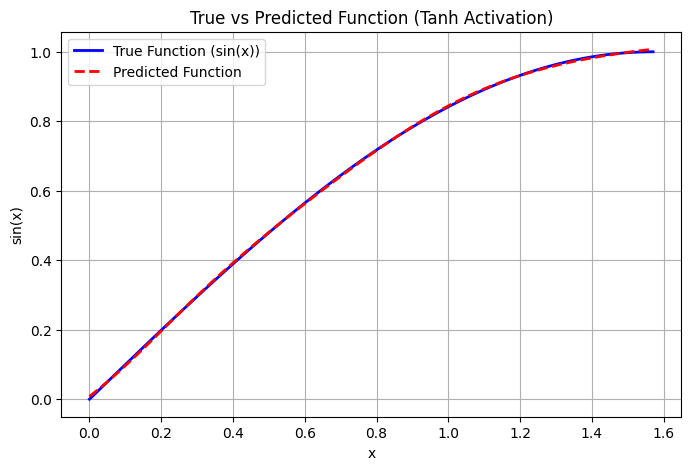


Training with Sigmoid activation function...
Epoch 0, Loss: 0.2802163362503052
Epoch 100, Loss: 0.09647074341773987
Epoch 200, Loss: 0.09646565467119217
Epoch 300, Loss: 0.02274535410106182
Epoch 400, Loss: 0.0013245241716504097
Epoch 500, Loss: 7.782079774187878e-05
Epoch 600, Loss: 2.8713455321849324e-05
Epoch 700, Loss: 1.362393595627509e-05
Epoch 800, Loss: 8.83833763509756e-06
Epoch 900, Loss: 6.130735982878832e-06


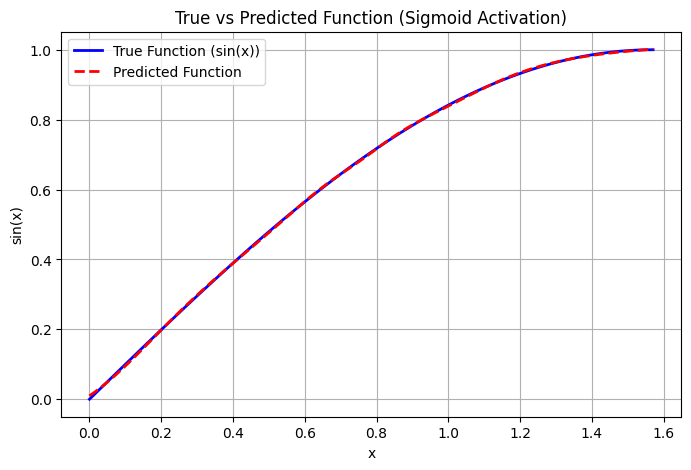


Training with ReLU activation function...
Epoch 0, Loss: 0.494449257850647
Epoch 100, Loss: 0.00028330236091278493
Epoch 200, Loss: 0.00011542425636434928
Epoch 300, Loss: 0.00015812837227713317
Epoch 400, Loss: 3.7216046621324494e-05
Epoch 500, Loss: 2.6462552341399714e-05
Epoch 600, Loss: 2.4927712729549967e-05
Epoch 700, Loss: 1.436844831914641e-05
Epoch 800, Loss: 4.5995693653821945e-05
Epoch 900, Loss: 7.935011126392055e-06


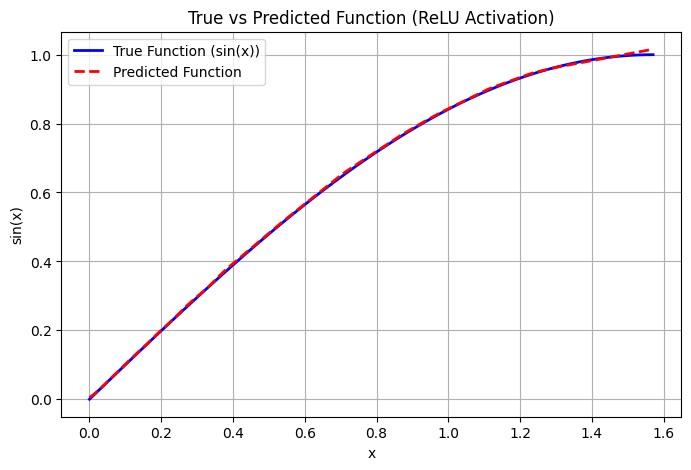


Training with Leaky ReLU activation function...
Epoch 0, Loss: 0.9511715769767761
Epoch 100, Loss: 0.00103430962190032
Epoch 200, Loss: 0.0003915636334568262
Epoch 300, Loss: 0.00022232654737308621
Epoch 400, Loss: 0.000142661840072833
Epoch 500, Loss: 9.94049696600996e-05
Epoch 600, Loss: 7.273980736499652e-05
Epoch 700, Loss: 5.518771649803966e-05
Epoch 800, Loss: 4.750613516080193e-05
Epoch 900, Loss: 5.9537273045862094e-05


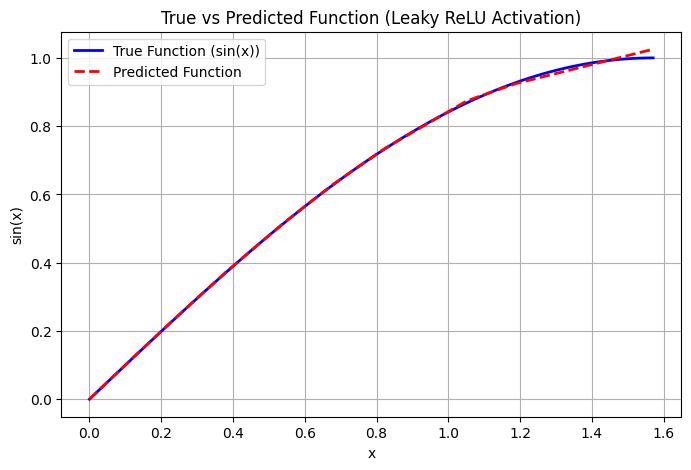

In [10]:
# Redefine the network class to accept an activation function as a parameter
class DeepNet(nn.Module):
    def __init__(self, activation_func):
        super(DeepNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 10),
            activation_func,
            *[nn.Sequential(nn.Linear(10, 10), activation_func) for _ in range(8)],  # 8 hidden layers
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Define a function to train and evaluate the network with a specified activation function
def train_with_activation(activation_func, activation_name):
    print(f"\nTraining with {activation_name} activation function...")

    # Instantiate the network with the given activation function
    net = DeepNet(activation_func)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_func = torch.nn.MSELoss()

    # Training loop
    num_epochs = 1000
    for i in range(num_epochs):
        prediction = net(x_tensor)
        loss = loss_func(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss.item()}")

    # Plot true vs predicted functions
    plt.figure(figsize=(8, 5))
    plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), label='True Function (sin(x))', color='blue', linewidth=2)
    plt.plot(x_tensor.detach().numpy(), net(x_tensor).detach().numpy(), label='Predicted Function', color='red', linestyle='--', linewidth=2)
    plt.title(f'True vs Predicted Function ({activation_name} Activation)')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.grid()
    plt.show()

# Train and evaluate with different activation functions
train_with_activation(nn.Tanh(), "Tanh")
train_with_activation(nn.Sigmoid(), "Sigmoid")
train_with_activation(nn.ReLU(), "ReLU")
train_with_activation(nn.LeakyReLU(0.01), "Leaky ReLU")


Keeping N=100 and using 10 layers, and the Tanh activation function, play with changing the learning rate of the network. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.



Training with learning rate = 0.001...
Epoch 0, Loss: 0.49728232622146606
Epoch 100, Loss: 0.07159489393234253
Epoch 200, Loss: 0.0012088081566616893
Epoch 300, Loss: 0.000613660435192287
Epoch 400, Loss: 0.00031197353382594883
Epoch 500, Loss: 0.00015051226364448667
Epoch 600, Loss: 7.395374268526211e-05
Epoch 700, Loss: 4.434079528436996e-05
Epoch 800, Loss: 3.457629281911068e-05
Epoch 900, Loss: 3.1228184525389224e-05


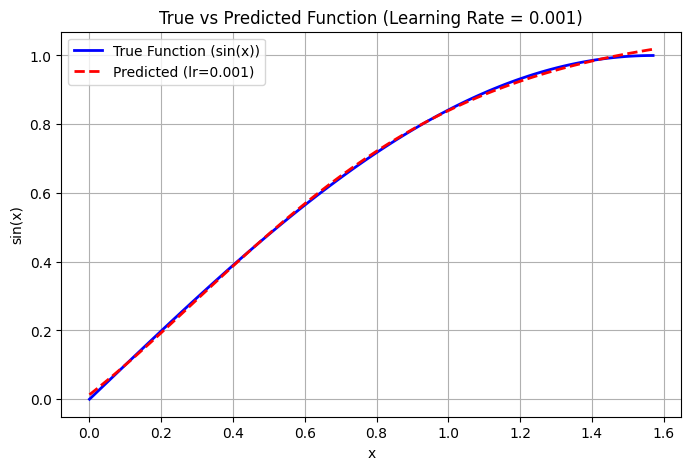


Training with learning rate = 0.01...
Epoch 0, Loss: 0.44403743743896484
Epoch 100, Loss: 8.048263407545164e-05
Epoch 200, Loss: 1.4192874914442655e-05
Epoch 300, Loss: 4.8118748964043334e-05
Epoch 400, Loss: 4.234465905028628e-06
Epoch 500, Loss: 4.042094587930478e-06
Epoch 600, Loss: 6.59291345073143e-06
Epoch 700, Loss: 4.694954441220034e-06
Epoch 800, Loss: 0.002544635208323598
Epoch 900, Loss: 8.431886271864641e-06


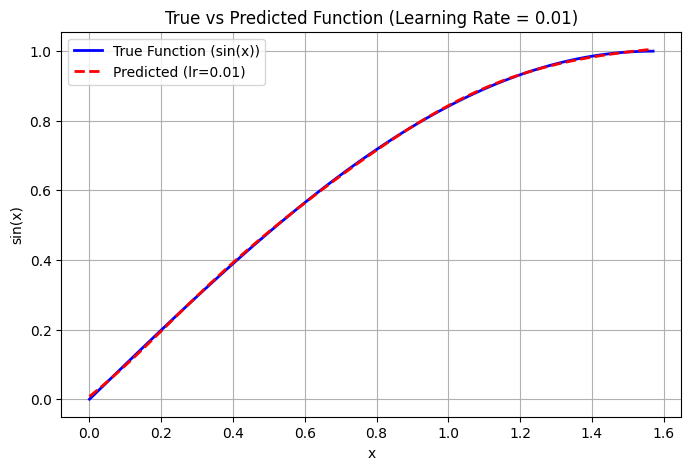


Training with learning rate = 0.1...
Epoch 0, Loss: 0.35865017771720886
Epoch 100, Loss: 0.09647123515605927
Epoch 200, Loss: 0.0964696854352951
Epoch 300, Loss: 0.0964696854352951
Epoch 400, Loss: 0.09646967798471451
Epoch 500, Loss: 0.09646967798471451
Epoch 600, Loss: 0.0964696854352951
Epoch 700, Loss: 0.11133652925491333
Epoch 800, Loss: 0.09646973758935928
Epoch 900, Loss: 0.0964696854352951


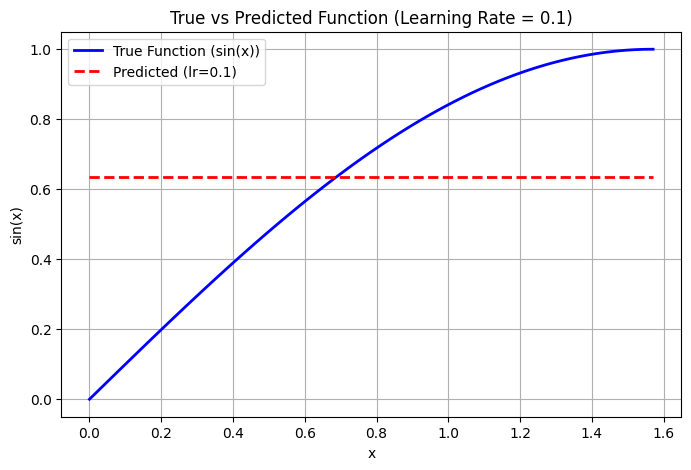

In [11]:
# Function to train the network with different learning rates
def train_with_learning_rate(lr):
    print(f"\nTraining with learning rate = {lr}...")

    # Instantiate the network with Tanh activation
    net = DeepNet(nn.Tanh())

    # Define optimizer with specified learning rate
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_func = torch.nn.MSELoss()

    # Training loop
    num_epochs = 1000
    for i in range(num_epochs):
        prediction = net(x_tensor)
        loss = loss_func(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss.item()}")

    # Plot true vs predicted functions
    plt.figure(figsize=(8, 5))
    plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), label='True Function (sin(x))', color='blue', linewidth=2)
    plt.plot(x_tensor.detach().numpy(), net(x_tensor).detach().numpy(), label=f'Predicted (lr={lr})', color='red', linestyle='--', linewidth=2)
    plt.title(f'True vs Predicted Function (Learning Rate = {lr})')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.grid()
    plt.show()

# Test with different learning rates
for lr in [0.001, 0.01, 0.1]:
    train_with_learning_rate(lr)


Keeping N=100 and using 10 layers, and the Tanh, change the width of each layer. Try width=5 and width=10. Continue printing the loss function every 100 epochs. How does the network training change? Write a few sentences about what you notice.



Training with layer width = 5...
Epoch 0, Loss: 0.6693823933601379
Epoch 100, Loss: 0.0016892034327611327
Epoch 200, Loss: 1.4635599654866382e-05
Epoch 300, Loss: 6.200558345881291e-06
Epoch 400, Loss: 5.552249604079407e-06
Epoch 500, Loss: 0.00016639064415358007
Epoch 600, Loss: 4.815577540284721e-06
Epoch 700, Loss: 2.9549692044383846e-05
Epoch 800, Loss: 4.904567504127044e-06
Epoch 900, Loss: 5.002083071303787e-06


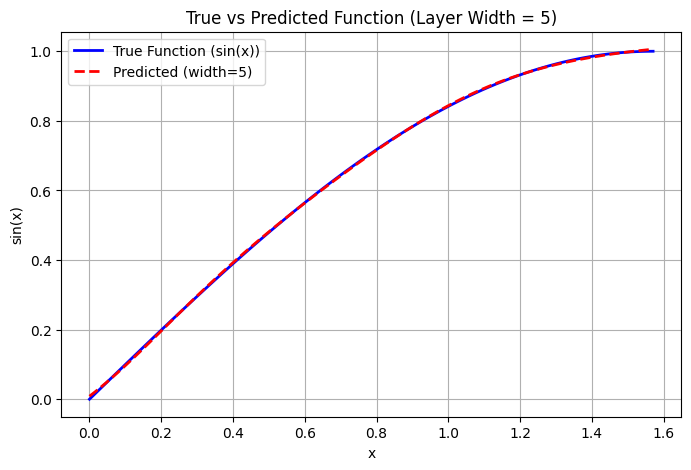


Training with layer width = 10...
Epoch 0, Loss: 0.41772934794425964
Epoch 100, Loss: 0.0009896636474877596
Epoch 200, Loss: 0.00012370539479888976
Epoch 300, Loss: 2.2286003513727337e-05
Epoch 400, Loss: 5.868802418262931e-06
Epoch 500, Loss: 5.2666314331872854e-06
Epoch 600, Loss: 4.29796455136966e-06
Epoch 700, Loss: 3.7409188280435046e-06
Epoch 800, Loss: 7.0789456003694795e-06
Epoch 900, Loss: 5.069260168966139e-06


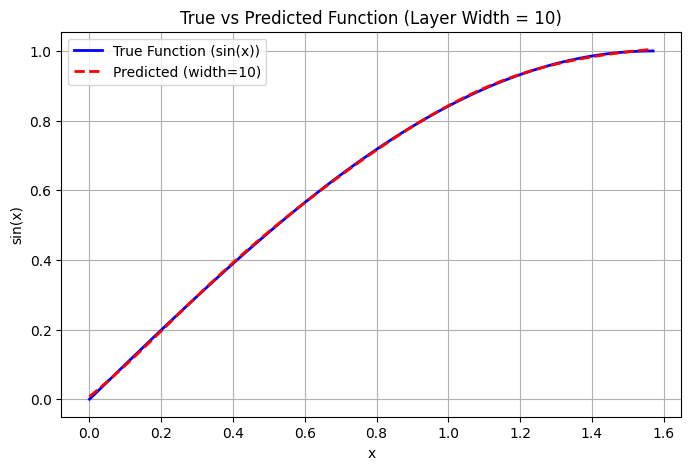

In [12]:
# Redefine network class to accept layer width as a parameter
class VariableWidthNet(nn.Module):
    def __init__(self, width):
        super(VariableWidthNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, width),
            nn.Tanh(),
            *[nn.Sequential(nn.Linear(width, width), nn.Tanh()) for _ in range(8)],  # 8 hidden layers
            nn.Linear(width, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Function to train the network with different layer widths
def train_with_layer_width(width):
    print(f"\nTraining with layer width = {width}...")

    # Instantiate the network with the specified layer width
    net = VariableWidthNet(width)

    # Define optimizer and loss function
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_func = torch.nn.MSELoss()

    # Training loop
    num_epochs = 1000
    for i in range(num_epochs):
        prediction = net(x_tensor)
        loss = loss_func(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss.item()}")

    # Plot true vs predicted functions
    plt.figure(figsize=(8, 5))
    plt.plot(x_tensor.detach().numpy(), y_tensor.detach().numpy(), label='True Function (sin(x))', color='blue', linewidth=2)
    plt.plot(x_tensor.detach().numpy(), net(x_tensor).detach().numpy(), label=f'Predicted (width={width})', color='red', linestyle='--', linewidth=2)
    plt.title(f'True vs Predicted Function (Layer Width = {width})')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.grid()
    plt.show()

# Test with different layer widths
for width in [5, 10]:
    train_with_layer_width(width)


**Bonus question: Repeat the first problem with N=100 and 10 layers, but instead of reconstructing the sine function, import a sound wave through Librosa, sample it and then reconstruct the sound from the samples through a network.**

https://librosa.org/doc/latest/index.html

Alter the activation function, learning rate, and and width. Notice changes in training speed and accuracy.


C:\Users\2533a\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


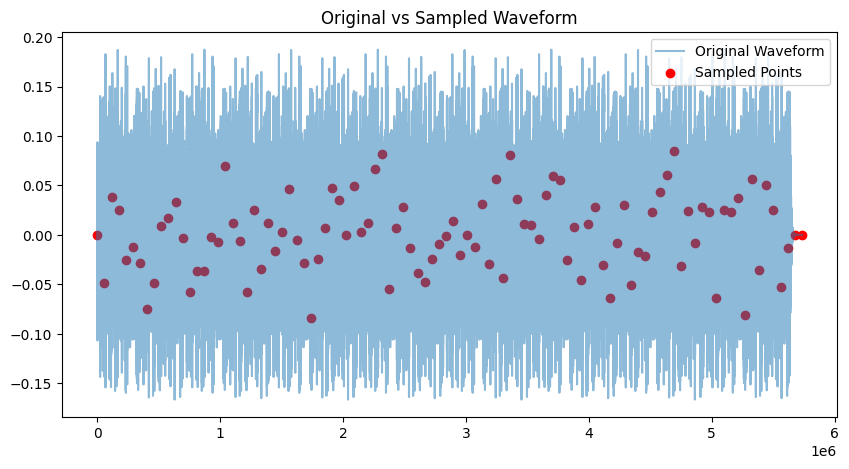


Training with Tanh, width=10, learning rate=0.01...
Epoch 0, Loss: 0.034353990107774734
Epoch 100, Loss: 0.0014429789735004306
Epoch 200, Loss: 0.0014102113200351596
Epoch 300, Loss: 0.0014071088517084718
Epoch 400, Loss: 0.0014050883473828435
Epoch 500, Loss: 0.0014027062570676208
Epoch 600, Loss: 0.0013368554646149278
Epoch 700, Loss: 0.0012776991352438927
Epoch 800, Loss: 0.001225299434736371
Epoch 900, Loss: 0.0012111153919249773


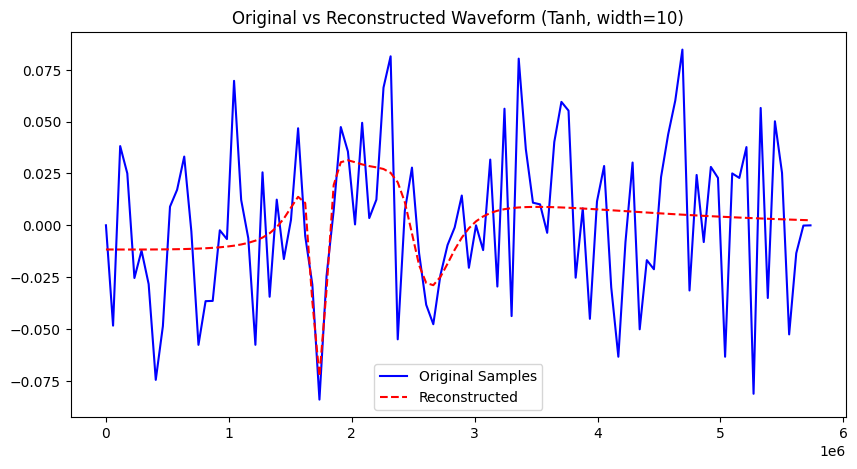


Training with Tanh, width=20, learning rate=0.01...
Epoch 0, Loss: 0.0838983952999115
Epoch 100, Loss: 0.0014201943995431066
Epoch 200, Loss: 0.0014099269174039364
Epoch 300, Loss: 0.0014059862587600946
Epoch 400, Loss: 0.0013718928676098585
Epoch 500, Loss: 0.0013260238338261843
Epoch 600, Loss: 0.0013177060754969716
Epoch 700, Loss: 0.001283598248846829
Epoch 800, Loss: 0.0012668672716245055
Epoch 900, Loss: 0.0012280585942789912


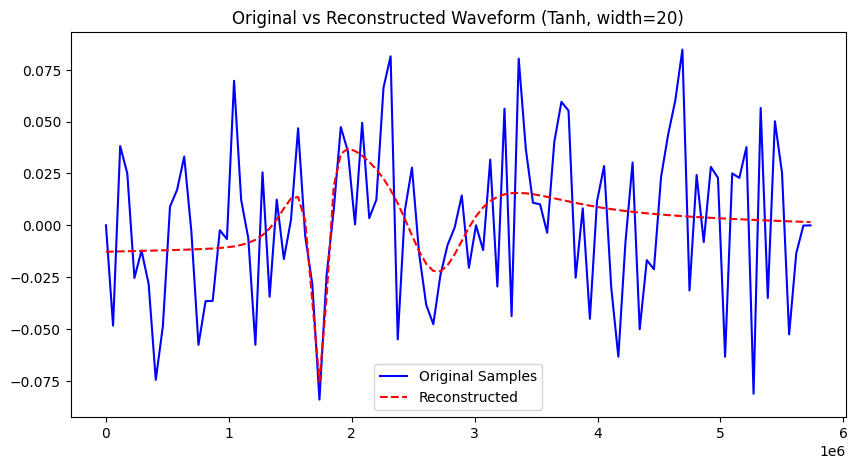


Training with Sigmoid, width=10, learning rate=0.01...
Epoch 0, Loss: 0.022502943873405457
Epoch 100, Loss: 0.0014512299094349146
Epoch 200, Loss: 0.001450843526981771
Epoch 300, Loss: 0.001450843526981771
Epoch 400, Loss: 0.001450843526981771
Epoch 500, Loss: 0.001450843526981771
Epoch 600, Loss: 0.001450843526981771
Epoch 700, Loss: 0.001450843526981771
Epoch 800, Loss: 0.001450843526981771
Epoch 900, Loss: 0.001450843526981771


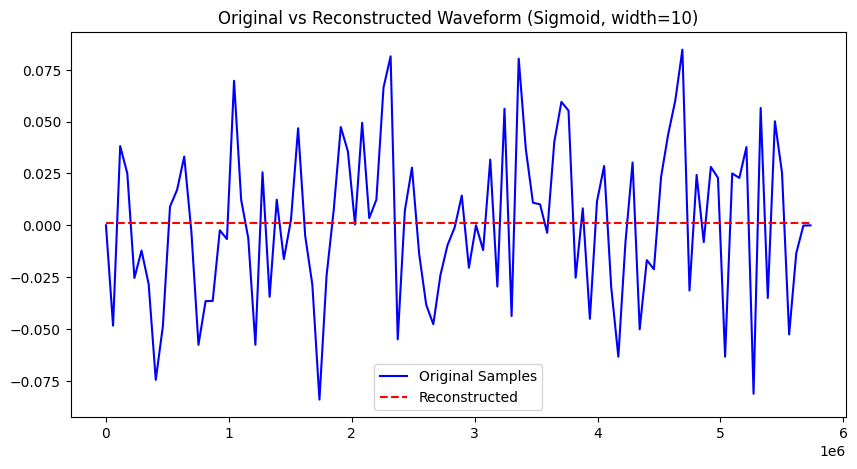


Training with Sigmoid, width=20, learning rate=0.01...
Epoch 0, Loss: 0.1127764880657196
Epoch 100, Loss: 0.0014509125612676144
Epoch 200, Loss: 0.001450843526981771
Epoch 300, Loss: 0.001450843526981771
Epoch 400, Loss: 0.0014508436433970928
Epoch 500, Loss: 0.001450843526981771
Epoch 600, Loss: 0.0014508436433970928
Epoch 700, Loss: 0.0014508436433970928
Epoch 800, Loss: 0.001450843526981771
Epoch 900, Loss: 0.0014508436433970928


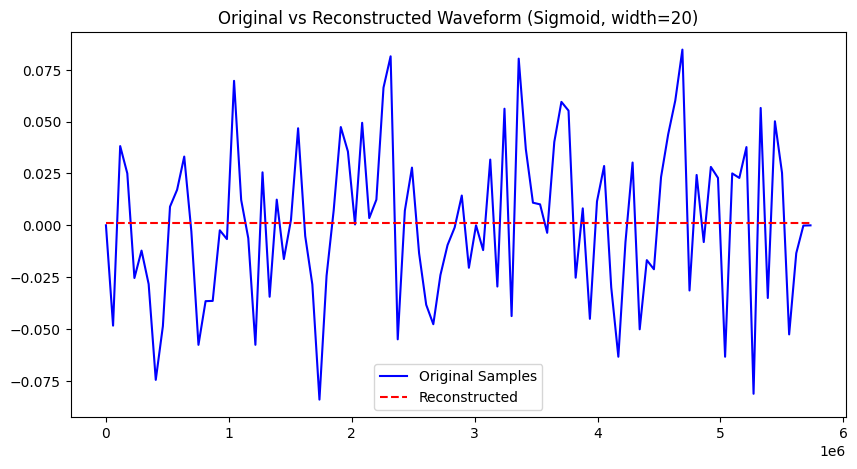


Training with ReLU, width=10, learning rate=0.01...
Epoch 0, Loss: 0.08551892638206482
Epoch 100, Loss: 0.001430786564014852
Epoch 200, Loss: 0.0014262560289353132
Epoch 300, Loss: 0.0014262287877500057
Epoch 400, Loss: 0.0014262284385040402
Epoch 500, Loss: 0.0014262290205806494
Epoch 600, Loss: 0.0014262289041653275
Epoch 700, Loss: 0.0014262287877500057
Epoch 800, Loss: 0.0014262287877500057
Epoch 900, Loss: 0.0014262290205806494


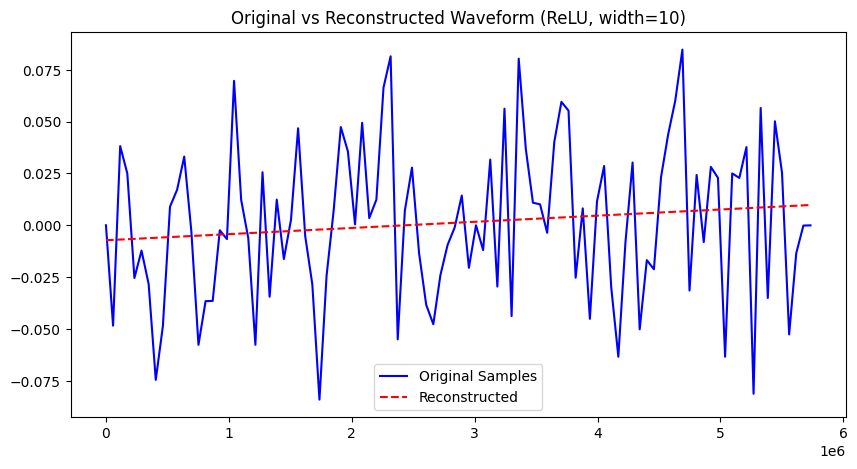


Training with ReLU, width=20, learning rate=0.01...
Epoch 0, Loss: 0.0020623919554054737
Epoch 100, Loss: 0.0014507807791233063
Epoch 200, Loss: 0.001365674426779151
Epoch 300, Loss: 0.001270986394956708
Epoch 400, Loss: 0.001101560890674591
Epoch 500, Loss: 0.001128527568653226
Epoch 600, Loss: 0.001106761279515922
Epoch 700, Loss: 0.0011017662473022938
Epoch 800, Loss: 0.001074254629202187
Epoch 900, Loss: 0.0010732216760516167


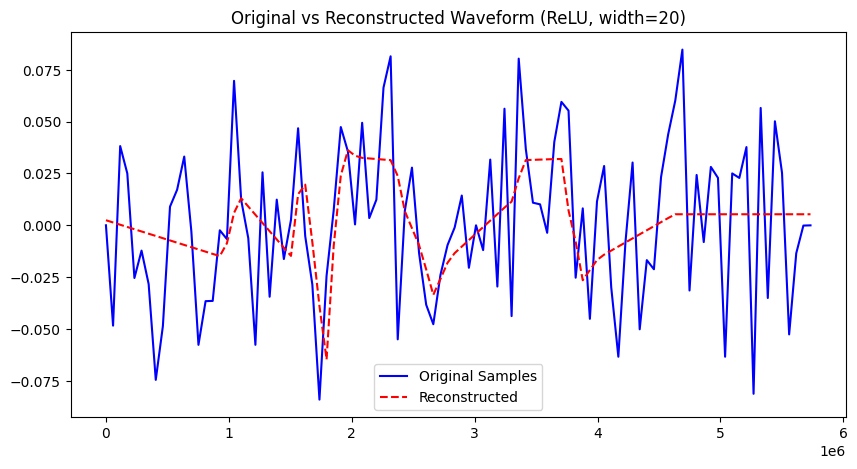


Training with Leaky ReLU, width=10, learning rate=0.01...
Epoch 0, Loss: 0.027605881914496422
Epoch 100, Loss: 0.001450762734748423
Epoch 200, Loss: 0.0014505897415801883
Epoch 300, Loss: 0.001449775299988687
Epoch 400, Loss: 0.0013563440879806876
Epoch 500, Loss: 0.00120960280764848
Epoch 600, Loss: 0.0011506055016070604
Epoch 700, Loss: 0.0011370531283318996
Epoch 800, Loss: 0.0011045918799936771
Epoch 900, Loss: 0.0010457311291247606


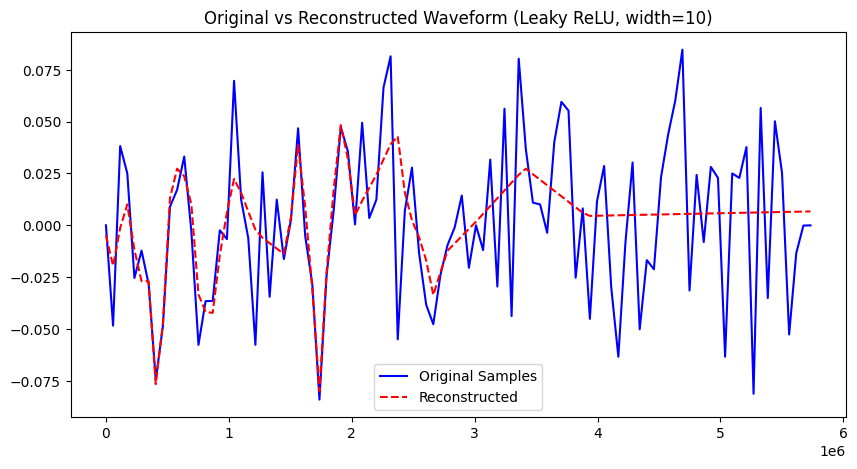


Training with Leaky ReLU, width=20, learning rate=0.01...
Epoch 0, Loss: 0.02069452777504921
Epoch 100, Loss: 0.0014508409658446908
Epoch 200, Loss: 0.0014507323503494263
Epoch 300, Loss: 0.0013954361202195287
Epoch 400, Loss: 0.0013984442921355367
Epoch 500, Loss: 0.0013537626946344972
Epoch 600, Loss: 0.001326986588537693
Epoch 700, Loss: 0.001358712324872613
Epoch 800, Loss: 0.0011618330609053373
Epoch 900, Loss: 0.001360663678497076


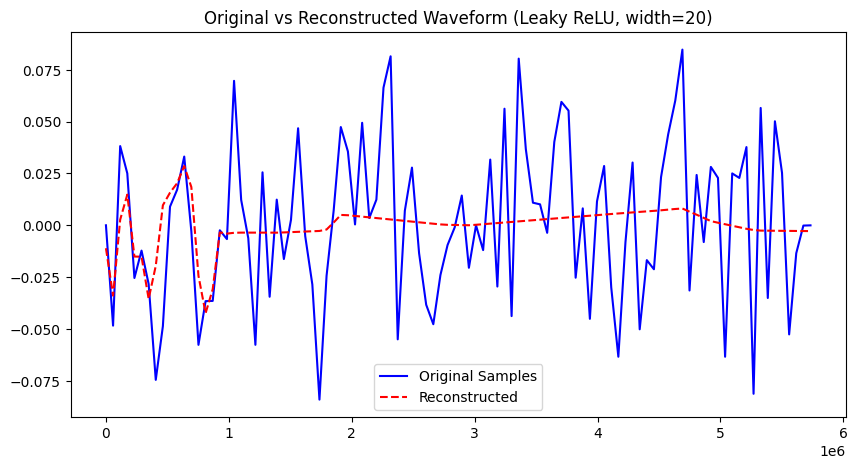


Training with Tanh (lr=0.001), width=10, learning rate=0.001...
Epoch 0, Loss: 0.0020255856215953827
Epoch 100, Loss: 0.001427196548320353
Epoch 200, Loss: 0.0014159363927319646
Epoch 300, Loss: 0.0014130130875855684
Epoch 400, Loss: 0.0014104945585131645
Epoch 500, Loss: 0.001405035611242056
Epoch 600, Loss: 0.001404812908731401
Epoch 700, Loss: 0.001404567970894277
Epoch 800, Loss: 0.001404208829626441
Epoch 900, Loss: 0.0014034489868208766


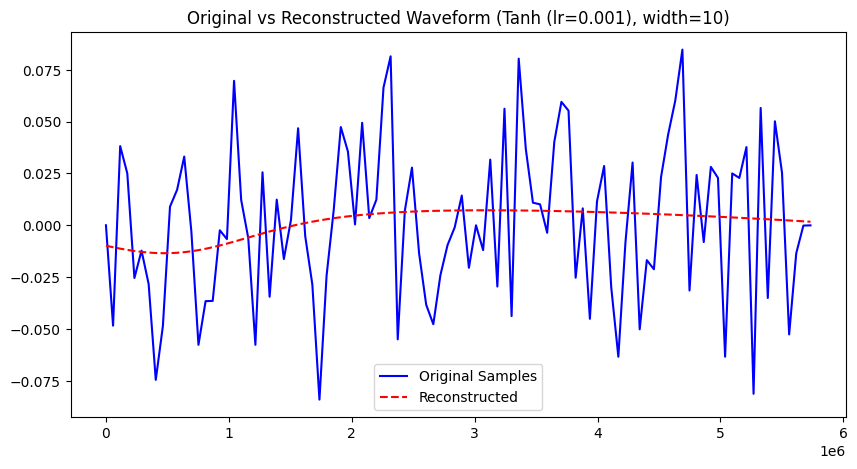


Training with Tanh (lr=0.01), width=10, learning rate=0.01...
Epoch 0, Loss: 0.06689559668302536
Epoch 100, Loss: 0.0014218755532056093
Epoch 200, Loss: 0.0014148115878924727
Epoch 300, Loss: 0.0014119255356490612
Epoch 400, Loss: 0.001410644850693643
Epoch 500, Loss: 0.0014082926791161299
Epoch 600, Loss: 0.0014062419068068266
Epoch 700, Loss: 0.0014052394544705749
Epoch 800, Loss: 0.0013987368438392878
Epoch 900, Loss: 0.0013418385060504079


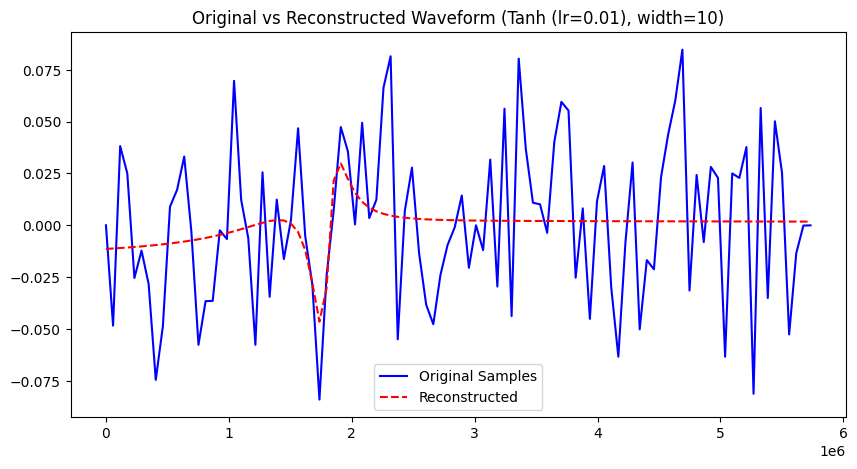


Training with Tanh (lr=0.1), width=10, learning rate=0.1...
Epoch 0, Loss: 0.1435178518295288
Epoch 100, Loss: 0.001451783231459558
Epoch 200, Loss: 0.001450843526981771
Epoch 300, Loss: 0.0014508431777358055
Epoch 400, Loss: 0.0014508425956591964
Epoch 500, Loss: 0.0014508427120745182
Epoch 600, Loss: 0.0014508434105664492
Epoch 700, Loss: 0.0014508423628285527
Epoch 800, Loss: 0.0015496335690841079
Epoch 900, Loss: 0.0014508466701954603


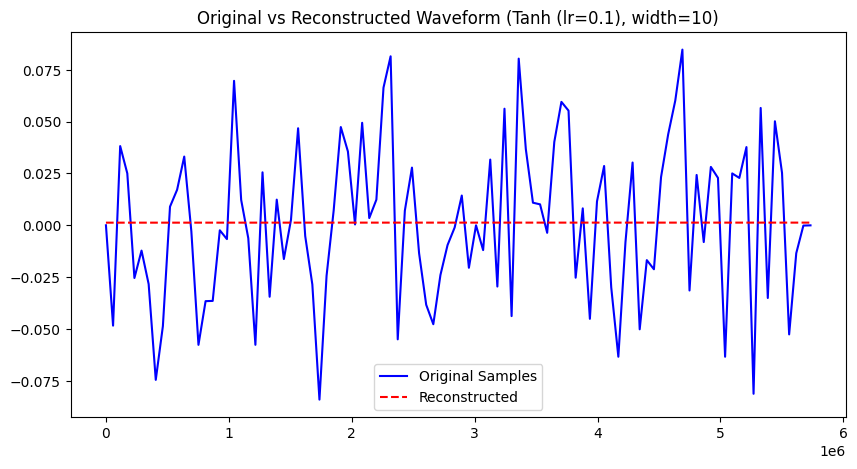

In [13]:
import librosa
import librosa.display

# Load the audio file
audio_file = "piano-loops-170-octave-up-long-loop.wav"  # Replace with the path to your audio file
y, sr = librosa.load(audio_file, sr=None)  # y = audio time series, sr = sample rate

# Sample a portion of the audio and visualize it
N = 100  # Number of samples
sample_indices = np.linspace(0, len(y)-1, N).astype(int)  # Equidistant sample indices
y_sampled = y[sample_indices]

plt.figure(figsize=(10, 5))
plt.plot(y, label="Original Waveform", alpha=0.5)
plt.scatter(sample_indices, y_sampled, color='red', label="Sampled Points")
plt.title("Original vs Sampled Waveform")
plt.legend()
plt.show()

# Convert sampled points to PyTorch tensors
x_tensor = torch.linspace(0, 1, N).view(-1, 1)  # Normalize x to [0, 1]
y_tensor = torch.from_numpy(y_sampled).view(-1, 1).float()

# Define a Neural Network (variable activation, width)
class SoundReconstructionNet(nn.Module):
    def __init__(self, activation_func, width):
        super(SoundReconstructionNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, width),
            activation_func,
            *[nn.Sequential(nn.Linear(width, width), activation_func) for _ in range(8)],  # 8 hidden layers
            nn.Linear(width, 1)
        )

    def forward(self, x):
        return self.layers(x)

# Train and Evaluate the Network
def train_and_reconstruct(activation_func, width, lr, activation_name):
    print(f"\nTraining with {activation_name}, width={width}, learning rate={lr}...")
    net = SoundReconstructionNet(activation_func, width)

    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss_func = nn.MSELoss()

    num_epochs = 1000
    for epoch in range(num_epochs):
        prediction = net(x_tensor)
        loss = loss_func(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    # Plot reconstructed vs original
    plt.figure(figsize=(10, 5))
    plt.plot(sample_indices, y_sampled, label="Original Samples", color='blue')
    plt.plot(sample_indices, prediction.detach().numpy(), label="Reconstructed", color='red', linestyle="--")
    plt.title(f"Original vs Reconstructed Waveform ({activation_name}, width={width})")
    plt.legend()
    plt.show()

# Test with Different Settings
for activation_func, activation_name in [(nn.Tanh(), "Tanh"), (nn.Sigmoid(), "Sigmoid"), (nn.ReLU(), "ReLU"), (nn.LeakyReLU(0.01), "Leaky ReLU")]:
    train_and_reconstruct(activation_func, width=10, lr=0.01, activation_name=activation_name)
    train_and_reconstruct(activation_func, width=20, lr=0.01, activation_name=activation_name)

for lr in [0.001, 0.01, 0.1]:
    train_and_reconstruct(nn.Tanh(), width=10, lr=lr, activation_name=f"Tanh (lr={lr})")